# Benchmark Strategy

[*********************100%***********************]  50 of 50 completed


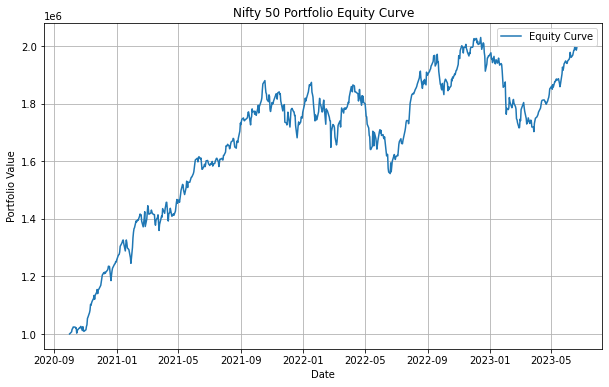

In [9]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the start and end dates
start_date = '2020-10-01'
end_date = '2023-06-21'  # Assuming today's date as the end date

# Get the Nifty 50 stock symbols
nifty50_symbols = ['RELIANCE.NS','HDFCBANK.NS','ICICIBANK.NS','INFY.NS','HDFC.NS','TCS.NS','ITC.NS','KOTAKBANK.NS',
                'HINDUNILVR.NS','LT.NS','SBIN.NS','BHARTIARTL.NS','BAJFINANCE.NS','AXISBANK.NS','ASIANPAINT.NS',
                'M&M.NS','MARUTI.NS','TITAN.NS','SUNPHARMA.NS','BAJAJFINSV.NS','HCLTECH.NS','ADANIENT.NS','TATASTEEL.NS',
                'INDUSINDBK.NS','NTPC.NS','POWERGRID.NS','TATAMOTORS.NS','ULTRACEMCO.NS','NESTLEIND.NS','TECHM.NS',
                'GRASIM.NS','CIPLA.NS','JSWSTEEL.NS','ADANIPORTS.NS','WIPRO.NS','HINDALCO.NS','SBILIFE.NS','DRREDDY.NS',
                'EICHERMOT.NS','HDFCLIFE.NS','ONGC.NS','TATACONSUM.NS','DIVISLAB.NS','BAJAJ-AUTO.NS','BRITANNIA.NS',
                'APOLLOHOSP.NS','COALINDIA.NS','UPL.NS','HEROMOTOCO.NS','BPCL.NS']  # List all 50 stock symbols here

# Fetch historical stock prices
data = yf.download(nifty50_symbols, start=start_date, end=end_date)

# Extract the 'Close' prices from the data
close_prices = data['Close']

# Calculate the number of shares for each stock
allocation_per_stock = 1000000 / 50
shares_per_stock = allocation_per_stock / close_prices.iloc[0]

# Calculate the portfolio value for each day
portfolio_value1 = (close_prices * shares_per_stock).sum(axis=1)

# Plot the equity curve
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value1.index, portfolio_value1, label='Equity Curve')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Nifty 50 Portfolio Equity Curve')
plt.legend()
plt.grid(True)
plt.show()

# strategy to beat benchmark

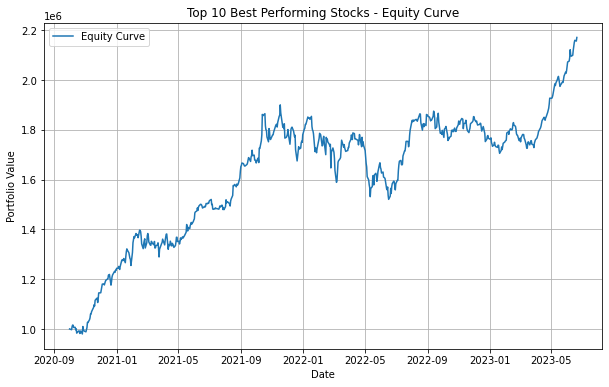

In [10]:
# Extract the 'Close' prices from the data
close_prices = data['Close']

# Calculate the percentage returns for the latest 100 days
returns = close_prices.pct_change(100)

# Get the top 10 best performing stocks
top_10_stocks = returns.iloc[-1].nlargest(10).index

# Calculate the number of shares for each stock
allocation_per_stock = 1000000 / 10
shares_per_stock = allocation_per_stock / close_prices.loc[start_date, top_10_stocks]

# Calculate the portfolio value for each day
portfolio_value2 = (close_prices[top_10_stocks] * shares_per_stock).sum(axis=1)

# Plot the equity curve
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value2.index, portfolio_value2, label='Equity Curve')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Top 10 Best Performing Stocks - Equity Curve')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Display the top 10 stocks
print("Top 10 Best Performing Stocks:")
print(top_10_stocks)

Top 10 Best Performing Stocks:
Index(['TATAMOTORS.NS', 'ITC.NS', 'BAJAJ-AUTO.NS', 'TITAN.NS', 'BAJFINANCE.NS',
       'APOLLOHOSP.NS', 'NESTLEIND.NS', 'ASIANPAINT.NS', 'BRITANNIA.NS',
       'TATACONSUM.NS'],
      dtype='object')


# Nifty Index Equity Curve

[*********************100%***********************]  51 of 51 completed


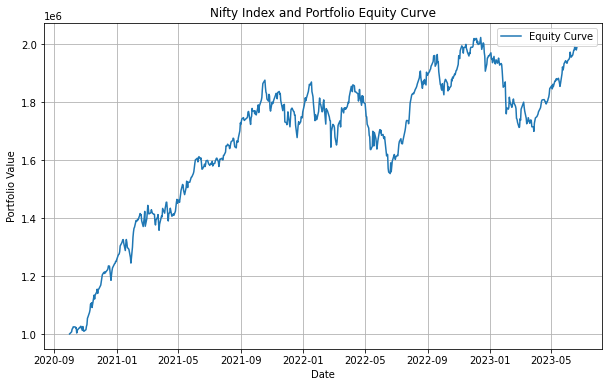

In [12]:
#we have to include the Nifty index in the analysis. 
# Add Nifty index symbol
nifty_index_symbol = '^NSEI'

# Combine Nifty 50 stocks with Nifty index
nifty_symbols = nifty50_symbols + [nifty_index_symbol]

# Fetch historical stock prices
data = yf.download(nifty_symbols, start=start_date, end=end_date)

# Extract the 'Close' prices from the data
close_prices = data['Close']

# Find the nearest available start date for all stocks
nearest_start_date = close_prices.dropna().index.min()

# Select the data from the nearest start date to the end date
close_prices = close_prices.loc[nearest_start_date:]

# Calculate the number of shares for each stock (including Nifty index)
allocation_per_stock = 1000000 / 51
shares_per_stock = allocation_per_stock / close_prices.iloc[0]

# Calculate the portfolio value for each day (including Nifty index)
portfolio_value3 = (close_prices * shares_per_stock).sum(axis=1)

# Plot the equity curve
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value3.index, portfolio_value3, label='Equity Curve')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Nifty Index and Portfolio Equity Curve')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
#Summarize the performance:
#Get the following performance metrics for Nifty Index, Benchmark Allocation & Sample Strategy

In [14]:
import numpy as np

# Calculate CAGR
def calculate_cagr(portfolio_value):
    start_value = portfolio_value[0]
    end_value = portfolio_value[-1]
    num_years = len(portfolio_value) / 252
    if start_value == 0:
        cagr = np.nan
    else:
        cagr = ((end_value / start_value) ** (1 / num_years) - 1) * 100
    return cagr

# Calculate Volatility
def calculate_volatility(returns):
    volatility = np.std(returns) * np.sqrt(252) * 100
    return volatility

# Calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    annualized_returns = np.mean(returns) * 252
    annualized_volatility = np.std(returns) * np.sqrt(252)
    sharpe_ratio = annualized_returns / annualized_volatility
    return sharpe_ratio

# Calculate performance metrics
nifty_cagr = calculate_cagr(portfolio_value3)
benchmark_cagr = calculate_cagr(portfolio_value1)
sample_strategy_cagr = calculate_cagr(portfolio_value2)

# Calculate daily returns
nifty_index_returns = portfolio_value3.pct_change().dropna()
benchmark_returns = portfolio_value1.pct_change().dropna()
sample_strategy_returns = portfolio_value2.pct_change().dropna()


nifty_volatility = calculate_volatility(nifty_index_returns)
benchmark_volatility = calculate_volatility(benchmark_returns)
sample_strategy_volatility = calculate_volatility(sample_strategy_returns)

nifty_sharpe_ratio = calculate_sharpe_ratio(nifty_index_returns)
benchmark_sharpe_ratio = calculate_sharpe_ratio(benchmark_returns)
sample_strategy_sharpe_ratio = calculate_sharpe_ratio(sample_strategy_returns)

# Print performance metrics
print("Performance Metrics:")
print("----------------------------")
print("Nifty Index:")
print("CAGR (%):", nifty_cagr)
print("Volatility (%):", nifty_volatility)
print("Sharpe Ratio:", nifty_sharpe_ratio)
print()
print("Benchmark Allocation:")
print("CAGR (%):", benchmark_cagr)
print("Volatility (%):", benchmark_volatility)
print("Sharpe Ratio:", benchmark_sharpe_ratio)
print()
print("Sample Strategy:")
print("CAGR (%):", sample_strategy_cagr)
print("Volatility (%):", sample_strategy_volatility)
print("Sharpe Ratio:", sample_strategy_sharpe_ratio)


Performance Metrics:
----------------------------
Nifty Index:
CAGR (%): 29.302527035043767
Volatility (%): 17.17842196044768
Sharpe Ratio: 1.585183169258995

Benchmark Allocation:
CAGR (%): 29.467809680010436
Volatility (%): 17.11987620853122
Sharpe Ratio: 1.5975186680623688

Sample Strategy:
CAGR (%): 33.62903617109303
Volatility (%): 17.8968471252702
Sharpe Ratio: 1.7127935094348332
